In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X
    """
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # create x value (we're gonig to make predictions on these)
    X_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions
    y_pred = model.predict(X_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("dong multiclass classification")
        # we have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)


    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [3]:
# set random seed
tf.random.set_seed(42)

# create a model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",
               optimizer=tf.keras.optimizers.legacy.Adam(),
               metrics=['accuracy'])

# fit the model
history = model_7.fit(X, y, epochs=100)

Epoch 1/100


2023-07-03 11:54:16.221729: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


32/32 [==============================] - 1s 9ms/step - loss: 0.7016 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6966 - accuracy: 0.4950
Epoch 3/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6947 - accuracy: 0.4980
Epoch 4/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6945 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6940 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6941 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.4970
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6939 - accuracy: 0.4960
Epoch 9/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6938 - accuracy: 0.4660
Epoch 11/100
32/32 [=

32/32 [==============================] - 0s 7ms/step - loss: 0.6936 - accuracy: 0.4880
Epoch 84/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6932 - accuracy: 0.5270
Epoch 85/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5230
Epoch 86/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.5210
Epoch 87/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5090
Epoch 88/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.4840
Epoch 89/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.4890
Epoch 90/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6937 - accuracy: 0.4520
Epoch 91/100
32/32 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.4920
Epoch 92/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6936 - accuracy: 0.5000
Epoch 93/100


In [4]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5190


[0.6932182908058167, 0.5189999938011169]

313/313 [==============================] - 0s 1ms/step
doing binary classification


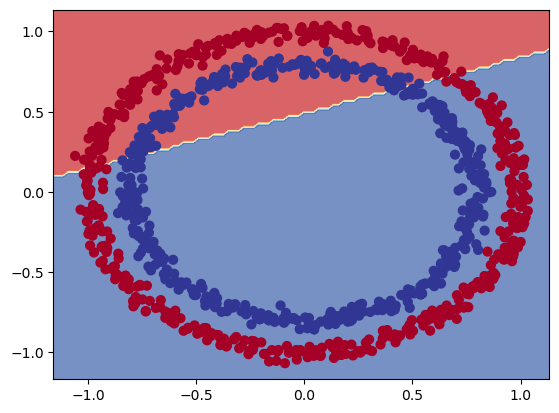

In [5]:
# visualize the data
plot_decision_boundary(model_7, X, y)

In [7]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
